# Functions

In [1]:
# Functions
def linechart(df, x, length=8, width=15, title=''):
    if df.index.name != x:
        df = df.set_index(x)
    
    ax = df.plot(figsize=(width, length), cmap='jet')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=4)
    
    plt.title(title + '\n', fontsize=20)

    plt.show()

def histogram(df, field=None, length=8, width=15, title=''):
    plt.figure(figsize=(width, length))
    sns.distplot(df[field])
    plt.title(title + '\n', fontsize=16)

    plt.show()

def barchart(df, x, y, groups=None, length=8, width=14, title=''):
    plt.figure(figsize=(width, length))
    sns.barplot(data=df, x=x, y=y, hue=groups)
    plt.title(title + '/n', fontsize=16)
    
    plt.show()

def heatmap(df, length=8, width=18, title=''):
    plt.figure(figsize=(width, length))
    ax = sns.heatmap(df, annot=True, fmt='.1f', cmap='Reds',
                     linewidths=.01)
    plt.title(title + '\n', fontsize=16)

    plt.show()

def correlation_plot(df, title=''):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15,10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
    plt.title(title + '\n', fontsize=20)

    plt.show()

def scatterplot(df, x, y, length=8, width=14, title=''):
    grid = sns.lmlot(x=x, y=y, data=df)
    grid.fig.set_figwidth(width)
    grid.fig.set_figheight(length)
    plt.title(title + '\n', fontsize=18)

    plt.show()

def violin(df, x, y, length=8, width=15, title=''):
    plt.figure(figsize=(width, length))
    sns.violinplot(x=x, y=y, data=df)
    plt.title(title + '\n', fontsize=20)

    plt.show()



# Time Series Data Exploration & Visualization Assignment

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### Read the sales.csv data set into a Pandas dataframe.

In [3]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv',
                 delimiter=';')

df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


In [4]:
df.columns = [x.replace(' ', '').lower() for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
salesid              int64
salespersonid        int64
customerid           int64
productid            int64
quantity             int64
discount             float64
totalprice           object
salesdate            object
transactionnumber    object
dtypes: float64(1), int64(5), object(3)
memory usage: 464.0+ MB


### Convert the SalesDate field to a datetime data type.

In [5]:
df['salesdate'] = pd.to_datetime(df['salesdate'])
df.head()

,salesid,salespersonid,customerid,productid,quantity,discount,totalprice,salesdate,transactionnumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


### Create a line chart showing the number of total units sold per day in February.

In [6]:
df['date'] = df['salesdate'].dt.date


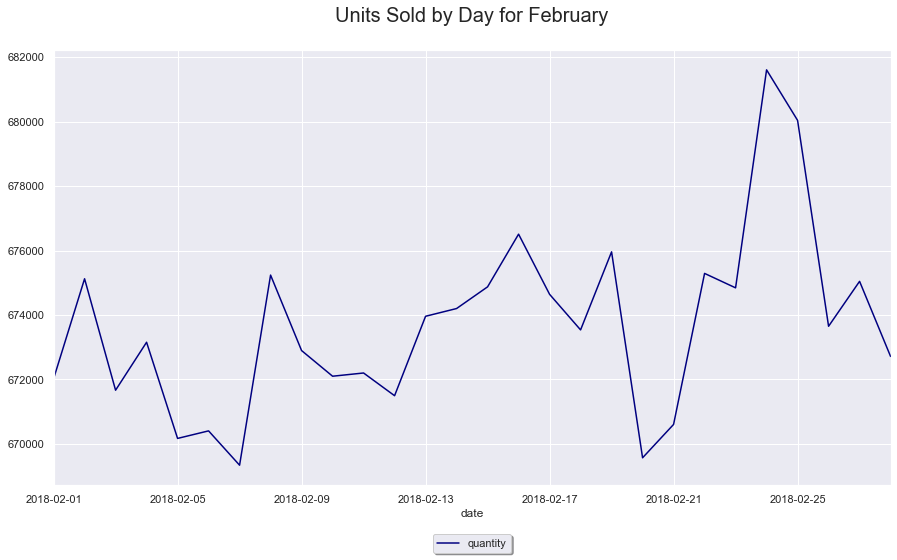

In [16]:
feb = df[df['salesdate'].dt.month == 2]
feb.head()
daily_units = feb.groupby('date').agg({'quantity':'sum'}).reset_index()
linechart(daily_units,'date',title='Units Sold by Day for February')

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

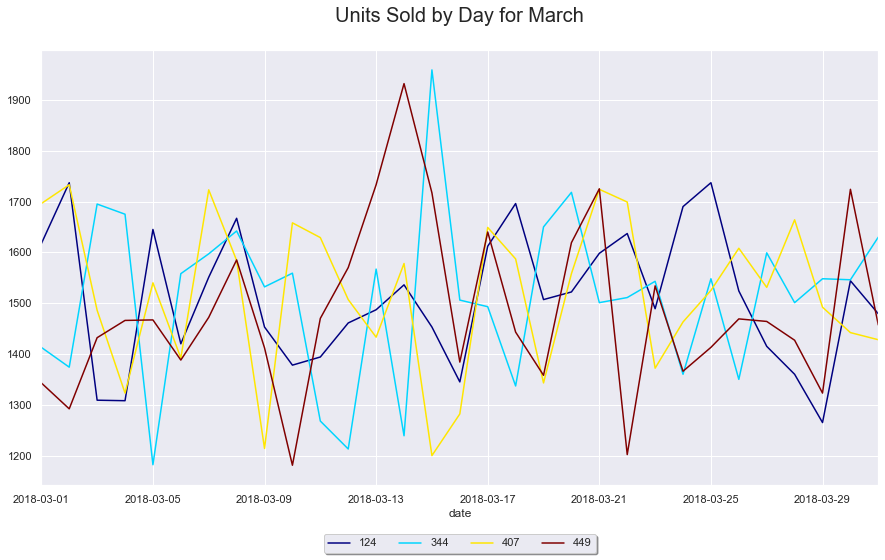

In [24]:
march = df[df['salesdate'].dt.month == 3]
products = march[march['productid'].isin([124, 344, 407,449])]
daily_units = products.pivot_table(index='date',columns='productid', values='quantity', aggfunc='sum')
linechart(daily_units,'date',title='Units Sold by Day for March')

### Create a bar chart that shows units sold by each hour of the day.

In [36]:
df['hour'] = df['salesdate'].dt.hour

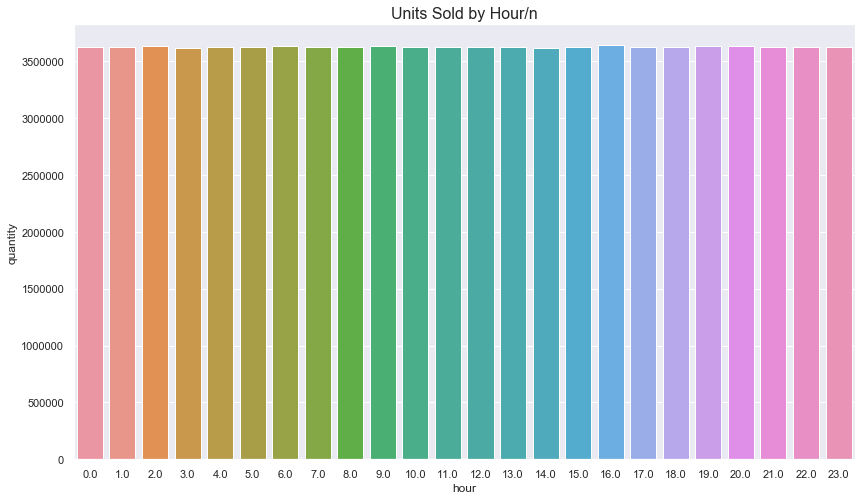

In [37]:
units = df.groupby('hour').agg({'quantity':'sum'}).reset_index()
barchart(units,'hour','quantity', title='Units Sold by Hour')

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

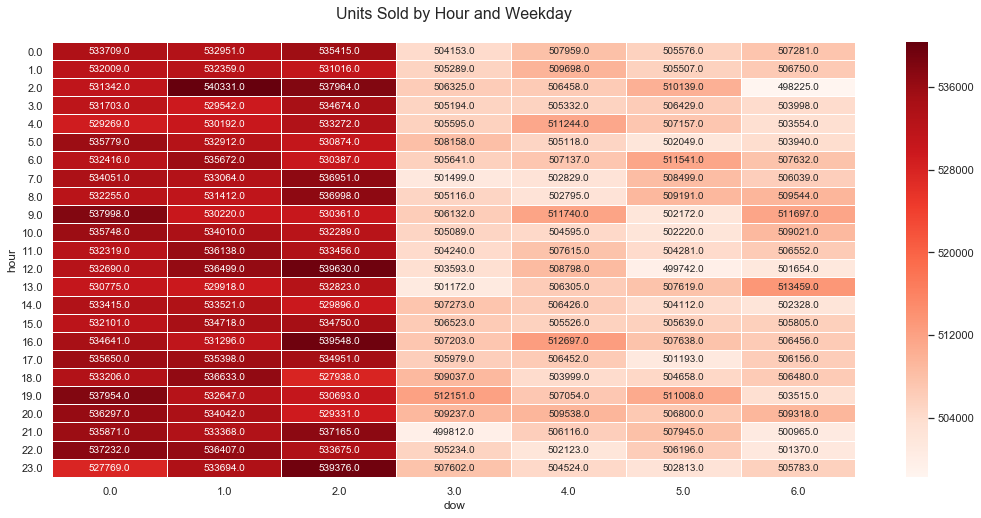

In [41]:
df['dow'] = df['salesdate'].dt.weekday
hwd = df.pivot_table(index='hour',columns='dow', values='quantity', aggfunc='sum')
heatmap(hwd,title='Units Sold by Hour and Weekday')

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

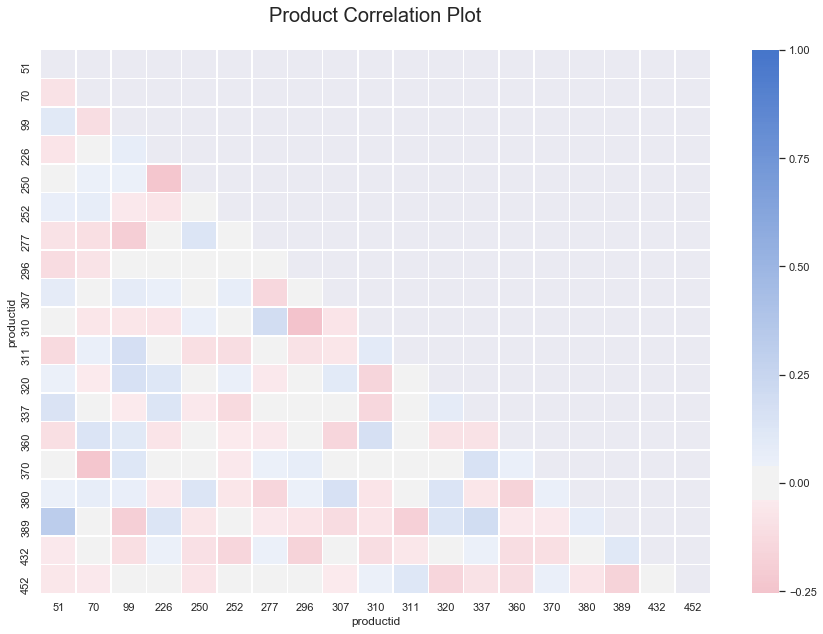

In [50]:
products = df['productid'].sample(20)
product_data = df[df.productid.isin(products)]
product_data_sales = product_data.pivot_table(index='date', columns='productid',values='quantity',aggfunc='sum')
correlation_plot(product_data_sales,title='Product Correlation Plot')

### Create a histogram showing the distribution of daily units sold.

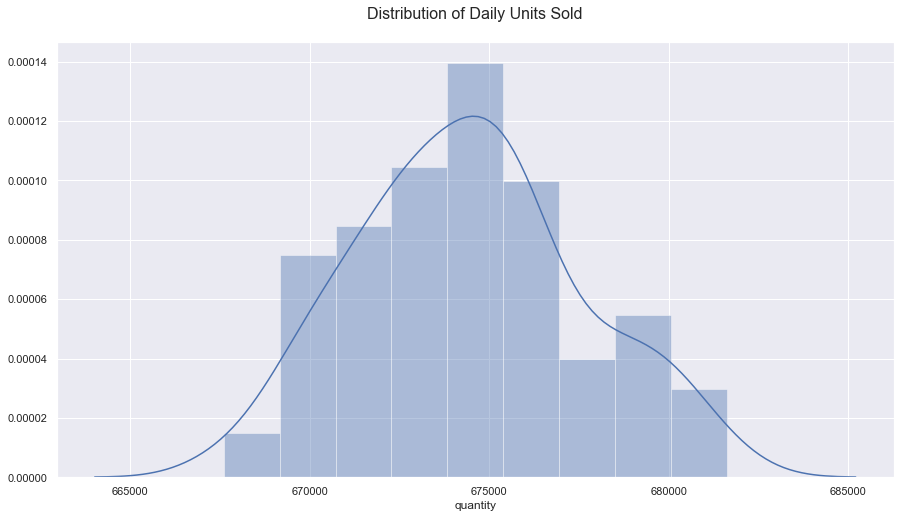

In [43]:
daily_units = df.groupby('date').agg({'quantity':'sum'}).reset_index()
histogram(daily_units, 'quantity', title='Distribution of Daily Units Sold')

### Create a violin plot showing the distribution of daily units sold by month.

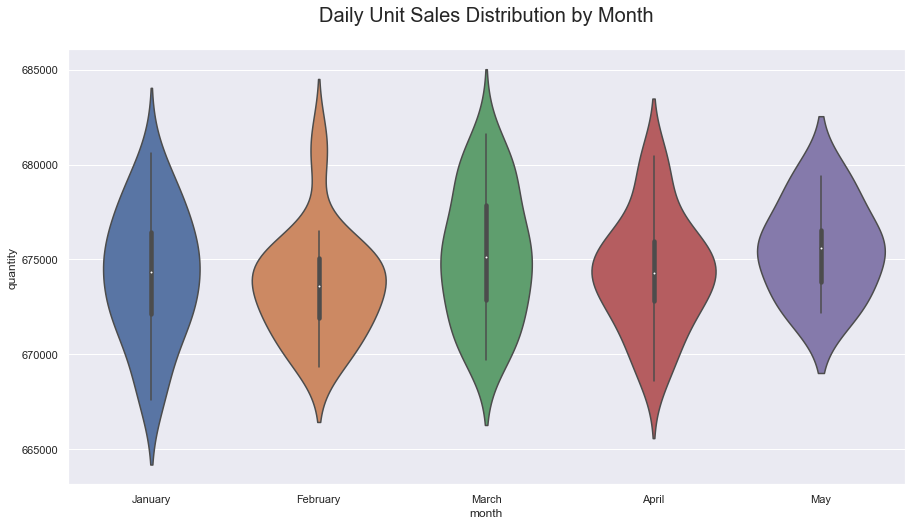

In [47]:
df['month'] = df['salesdate'].dt.month_name()
date_month_units = df.groupby(['date','month']).agg({'quantity':'sum'}).reset_index()
violin(date_month_units,'month','quantity', title='Daily Unit Sales Distribution by Month')